In [1]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

(512, 512)


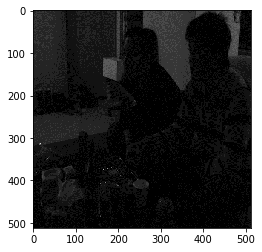

In [2]:
img = cv2.imread('chang.png',0)
nimg = cv2.imread('chang.png',0)
rimg = cv2.imread('chang.png',0)
print img.shape
#hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.imshow(img,cmap='gray')

In [3]:
bins = 256
globalstep = 0

In [4]:
def calculateHistogram(img):
    histogram = np.zeros(256)
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            histogram[img[i,j]] += 1
    return histogram

def binTheHistogram(img, bins):
    histogram = calculateHistogram(img)
    step = int(math.ceil(histogram.size/float(bins)))
    globalstep = step
    new_histogram = np.zeros(bins+1)
    rangesum = 0
    k = 0
    for i in range(0,histogram.size,step):
        for j in range(0,step):
            if i+j > 255 or k > bins:
                break
            rangesum += histogram[i+j]
        #print i,j,i+j, k
        new_histogram[k] = rangesum
        rangesum = 0
        k = k+1
    return new_histogram

[]

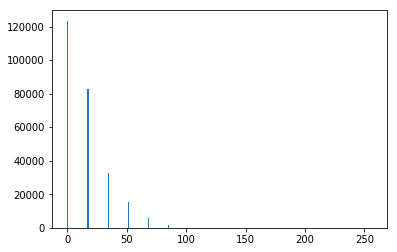

In [5]:
new_histogram = binTheHistogram(img,256)

y = plt.hist(range(0,new_histogram.shape[0]),weights = new_histogram, bins = 256)
plt.plot()

[]

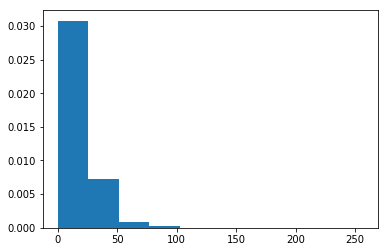

In [6]:
y = plt.hist([data for data in range(0,new_histogram.shape[0])],weights = new_histogram,normed=True)
plt.plot()

[]

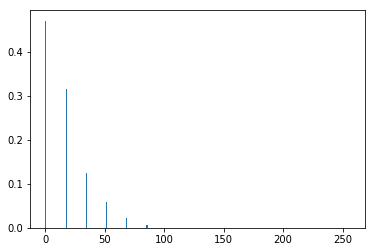

In [7]:
#calcution of cdf from created histogram
binnedcdf = np.cumsum(new_histogram)
y = plt.hist(range(0,new_histogram.shape[0]),weights = new_histogram,bins = 256,normed=True)
plt.plot()

[]

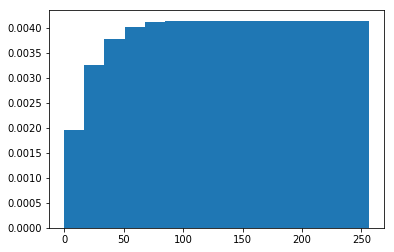

In [8]:
#plot cdf
y = plt.hist(range(0,binnedcdf.shape[0]),weights = binnedcdf,bins = binnedcdf.shape[0],normed=True)
plt.plot()

[]

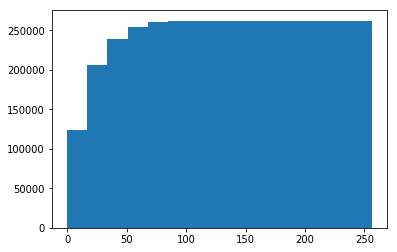

In [9]:
#calcution of cdf from created histogram
cdf = np.cumsum(new_histogram)
#cdf = cdf/img.size
y = plt.hist(range(0,cdf.shape[0]),weights = cdf,bins = cdf.shape[0])
plt.plot()

[]

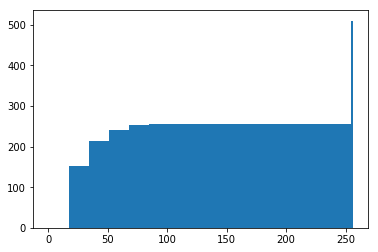

In [10]:
np.set_printoptions(suppress=True)
def equalization(hist):
    gmin =  min(min(np.nonzero(new_histogram)))
    hmin = hist[gmin]
    iterable = (math.ceil(((val - hmin)/(img.size - hmin))*255) for val in hist)
    ehistogram = np.fromiter(iterable,float)
    return ehistogram
ehist = equalization(cdf)
y = plt.hist(range(0,ehist.shape[0]),weights = ehist,bins = 256)
plt.plot()

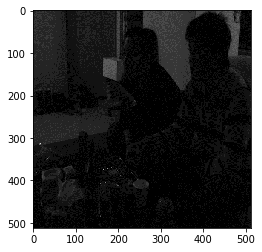

In [11]:
plt.imshow(img,cmap='gray')

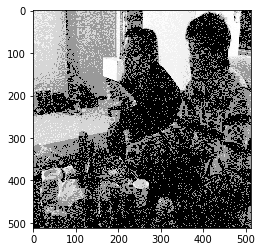

In [12]:
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        img[i,j] = ehist[img[i,j]]
plt.imshow(img,cmap='gray')

In [13]:
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        new_histogram[img[i,j]] += 1

[]

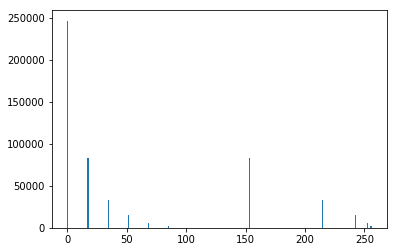

In [14]:
y = plt.hist(range(0,new_histogram.shape[0]),weights = new_histogram, bins = 256)
plt.plot()

[]

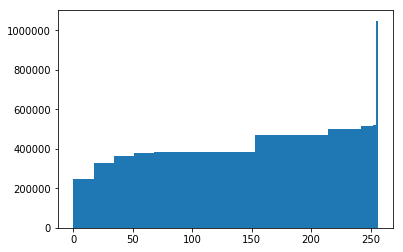

In [15]:
new_cdf = np.cumsum(new_histogram)
#new_cdf = new_cdf/img.size
y = plt.hist(range(0,new_cdf.shape[0]),weights = new_cdf,bins=256)
plt.plot()

(3264, 4928)


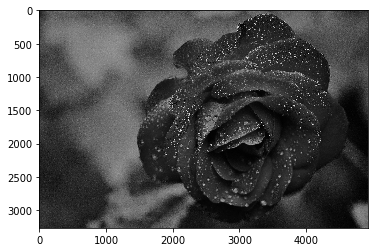

In [16]:
imgref = cv2.imread('rose-blue-flower-rose-blooms-67636.jpeg',0)
print imgref.shape
#hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.imshow(imgref,cmap='gray')

[]

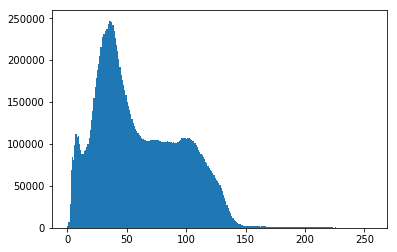

In [17]:
ref_histogram = binTheHistogram(imgref,256)
y = plt.hist(range(0,ref_histogram.shape[0]),weights = ref_histogram, bins = 256)
plt.plot()

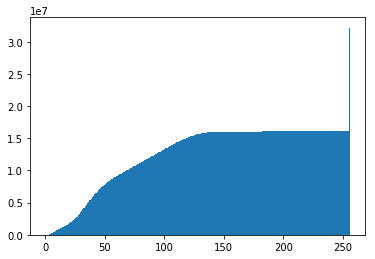

In [18]:
ref_cdf = np.cumsum(ref_histogram)
#ref_cdf = ref_cdf/imgref.size
y = plt.hist(range(0,ref_cdf.shape[0]),weights = ref_cdf, bins = 256)
plt.plot()
new_values = np.zeros(ref_cdf.size)

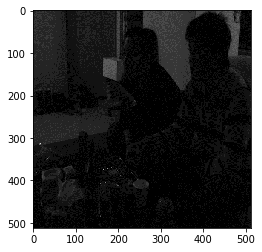

In [19]:
plt.imshow(nimg,cmap='gray')
k = 256

In [20]:
def matchTheHistograms(hist,ref_hist,img):
    for a in np.arange(256):
        j = k - 1
        while True:
            new_values[a] = j
            j = j - 1
            if j < 0 or hist[a] > ref_hist[j]:
                break
    for i in np.arange(img.shape[0]):
        for j in np.arange(img.shape[1]):
            a = img.item(i,j)
            b = new_values[a]
            img.itemset((i,j),b)
    plt.imshow(img,cmap='gray')
    return img

array([[5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 4, 5, 4],
       ..., 
       [4, 4, 4, ..., 5, 4, 5],
       [4, 4, 4, ..., 4, 5, 4],
       [4, 4, 4, ..., 4, 5, 4]], dtype=uint8)

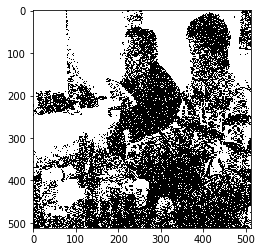

In [21]:
matchTheHistograms(cdf,ref_cdf,nimg)

[]

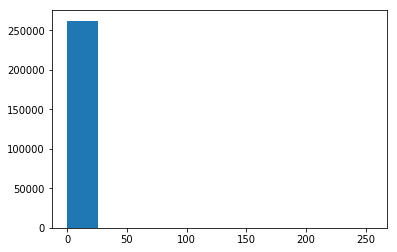

In [22]:
mhistogram = calculateHistogram(nimg)
y = plt.hist(range(0,mhistogram.shape[0]),weights = mhistogram, bins = 10)
plt.plot()

[]

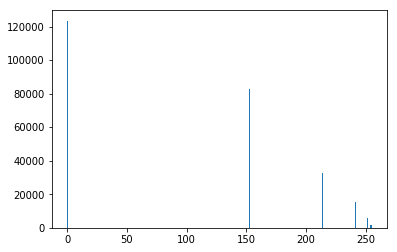

In [23]:
ehistogram = calculateHistogram(img)
y = plt.hist(range(0,ehistogram.shape[0]),weights = ehistogram, bins = 256)
plt.plot()

(512, 512)


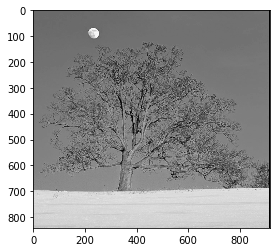

In [24]:
bimg = cv2.imread('bright.png',0)
print img.shape
#hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.imshow(bimg,cmap='gray')

[]

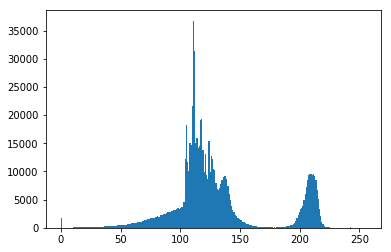

In [25]:
bhistogram = calculateHistogram(bimg)
y = plt.hist(range(0,bhistogram.shape[0]),weights = bhistogram, bins = 256)
plt.plot()

[]

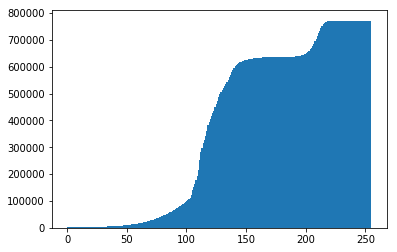

In [26]:
bcdf = np.cumsum(bhistogram)
y = plt.hist(range(0,bcdf.shape[0]),weights = bcdf, bins = 256)
plt.plot()

array([[111, 112, 112, ..., 104, 104, 104],
       [112, 112, 111, ..., 104, 104, 104],
       [112, 111, 112, ..., 104, 110, 104],
       ..., 
       [104, 104, 104, ..., 110, 104, 110],
       [104, 104, 104, ..., 104, 110, 104],
       [104, 104, 104, ..., 104, 110, 104]], dtype=uint8)

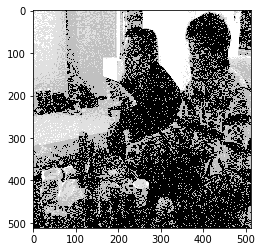

In [27]:
matchTheHistograms(cdf,bcdf,rimg)

In [28]:
fhist = calculateHistogram(rimg)

[]

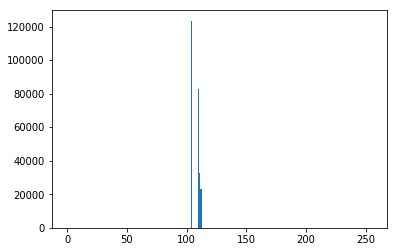

In [29]:
y = plt.hist(range(0,fhist.shape[0]),weights = fhist, bins = 256)
plt.plot()